<a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch?scriptVersionId=117154318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="table-of-contents" style="background-color:#000000; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#DD2706;">TOC</h1>
  <ol>
    <li><a href="#1" style="color: #DD2706;">1. Imports</a></li>
      <li><a href="#2" style="color: #DD2706;">2. Data Analysis</a></li>
    <li><a href="#3" style="color: #DD2706;">3. Data Preprocessing</a></li>
    <li><a href="#4" style="color: #DD2706;">4. Model Implementation</a></li>
    <li><a href="#5" style="color: #DD2706;">5. Sklearn Implementation</a></li>
    <li><a href="#6" style="color: #DD2706;">6. Thank You</a></li>  
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Imports</center></h1>

# Imports
  


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<a id="2"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Data Analysis</center></h1>

# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['black','red'])

In [4]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [5]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [6]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [7]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [8]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [9]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['black','red'])

In [10]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['black','red'])

In [11]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['black','red'])

<a id="3"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [12]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [15]:
corr = df.corr()

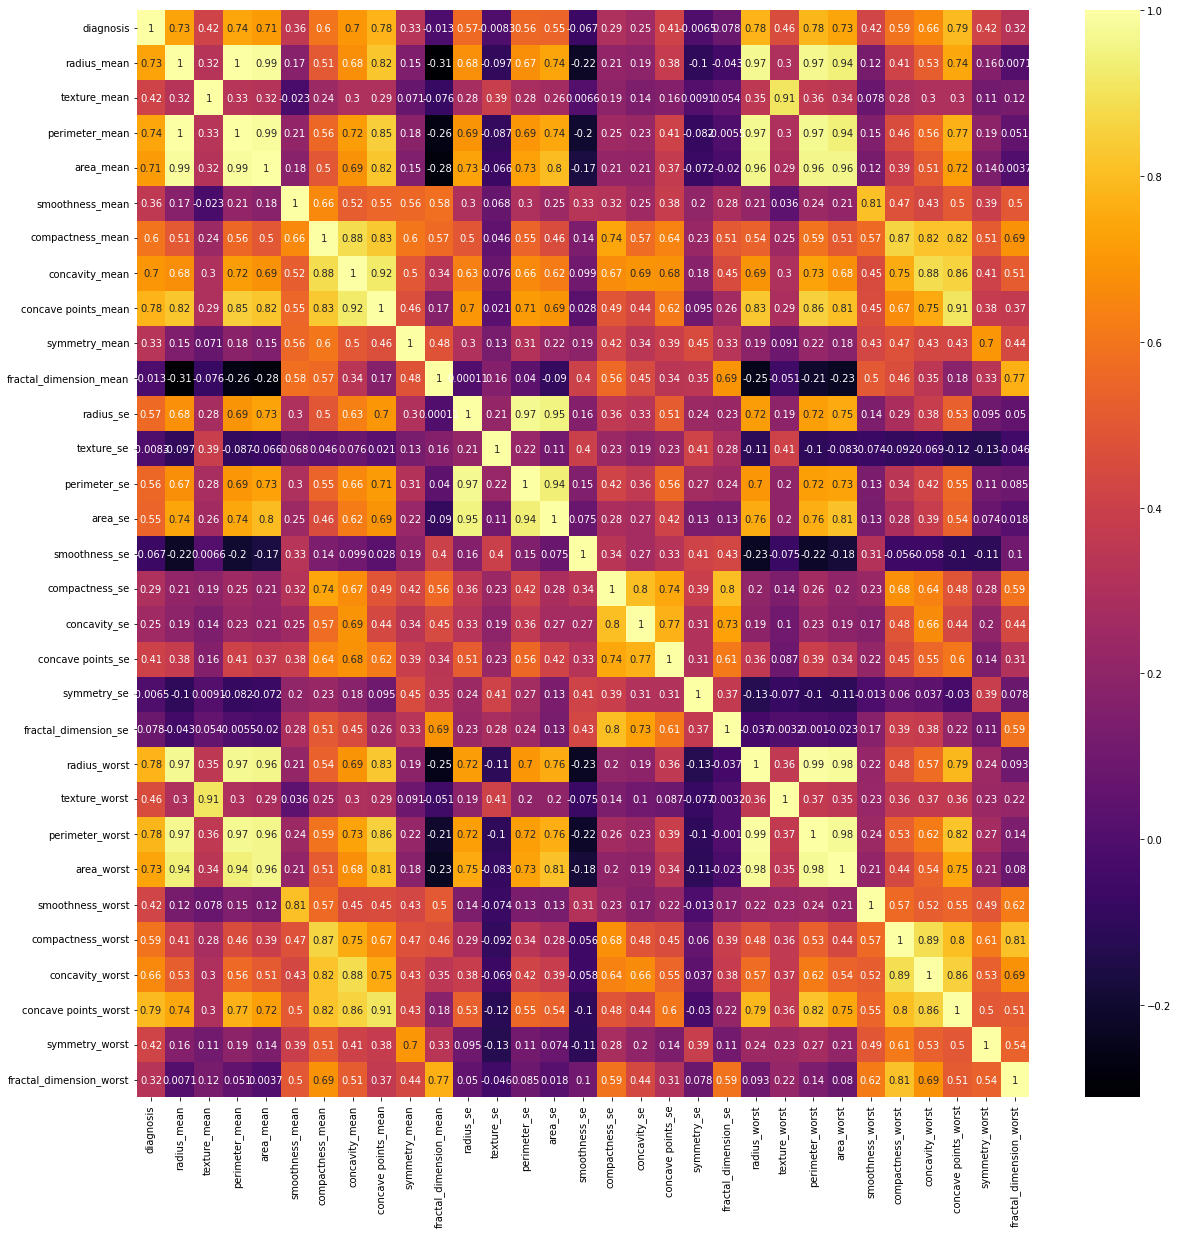

In [16]:

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='inferno',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Assign data and labels

In [18]:
X = df[names].values
y = df['diagnosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating


## Scale the data

In [20]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data


array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

<a id="4"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Model Implementation</center></h1>

# Model Implementation

# How the algorithm works

**Naive Bayes Depends on Bayesian Theorem is represented by this formula:**

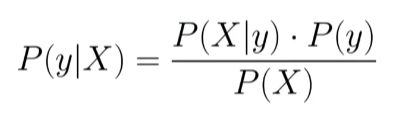

**Where y is the label, X is the features** 

## Now let's break down the formula

**P(y|X) is called the posterior where it's the probability "after" the evidence is considered**

**P(y) is called the prior where it's the probability "before" the evidence is considered**

**P(X|y) is called the Likelihood where it's the probability of the evidence given the belief is true**

**P(X) is called the Margin where it's the probability of the evidence in any case (We won't need that for our case)**

## So, why is called "Naive"

**Naive Bayes is called naive because it makes the assumption that the features are independent of each other**

## Goals

**Our goal is to maximize the posterior, so we'll choose the y that does so**

## Implementation Notes:
**We'll need to store the mean, the variance, and the prior**

**P(y) (the prior) is the number of elements in certain class / number of all elements in all classes**
 

**We'll assume that the data’s underlying distribution is gaussian**
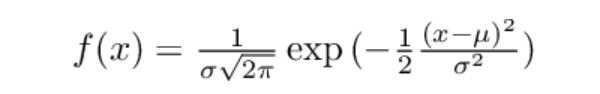

**We'll split P(X|y) (the posterior) to $log{P(x_1 | y)}$ + $log{P(x_2 | y)}$ + $log{P(x_3 | y)}$ .. + $log{P(x_n | y)}$**

**Here we are using log to avoid getting very small numbers that aren't interpetable**

**So y will me argmax[(the posterior) + $log{P(P_y)}$**]




In [21]:
class NaiveBayes:

    
    def fit(self, X, y):
        # Get the number of samples, number of features respectively
        self.m, self.n = X.shape
        
        # Get the unique elements in y in our case it's 0,1
        self.unique_classes = np.unique(y)
        # Get the number of the unique elements in our case it's 2
        self.n_unique  = len(self.unique_classes)
        
        #Create empty arrays to store our mean, variance and priors
        self.mean = np.zeros((self.m, self.n))
        self.variance = np.zeros((self.m, self.n))
        self.priors = np.zeros(self.n_unique)
        
   
        for i, c in enumerate((self.unique_classes)):
            # Get the portion of the data where y is equal to certain class
            X_c = X[y==c]
            #get the mean for each class and all features
            self.mean[i,:] = np.mean(X_c, axis=0)
            #get the variance for each class and all features
            self.variance[i,:] = np.var(X_c, axis=0)
            #Calculate the priors
            self.priors[i] = X_c.shape[0] / self.m
            
            
    def gaussian_density(self, x, c):
        #Get the mean and the variance
        mean = self.mean[c]
        variance = self.variance[c]
        # calculate the gaussian density function
        const = 1 / np.sqrt(variance * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / variance))
        return const * proba 
    
    def get_probability(self, x):
        #create empty list to store the posteriors
        posteriors = []
        for i, c in enumerate(self.unique_classes):
            #calculate the log of the prior
            prior = np.log(self.priors[i])
            #calculate new posterior and append it to the list
            posterior = np.sum(np.log(self.gaussian_density(x, i)))
            posterior = posterior + prior
            posteriors.append(posterior)
            # return the class with the highest class probability
        return self.unique_classes[np.argmax(posteriors)]

    def predict(self, X):
        #Create empty array to store the predictions
        predictions = []
        #loop over each sample in X 
        for x in X:
            #get the prediction for this sample
            pred = self.get_probability(x)
            # Append the prediction to the predictions list
            predictions.append(pred)
        return np.array(predictions)

In [22]:
model = NaiveBayes()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9649122807017544

<a id="5"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Sklearn Implementation</center></h1>

# Sklearn Implementation

In [23]:
from sklearn.naive_bayes import GaussianNB


sk_model = GaussianNB()

# Train the model using the training sets
sk_model.fit(X_train,y_train)

#Predict Output
sk_predictions = sk_model.predict(X_test) 

#Get the prediction accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sk_predictions)

0.9736842105263158

**Sklearn implementation seems to be abit better than ours**

**We'll try to update it in the next notebook version**

<a id="6"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Thank You</center></h1>

# Thank You

**Thank you for going through this notebook**

**If you have any suggestions please let me know**